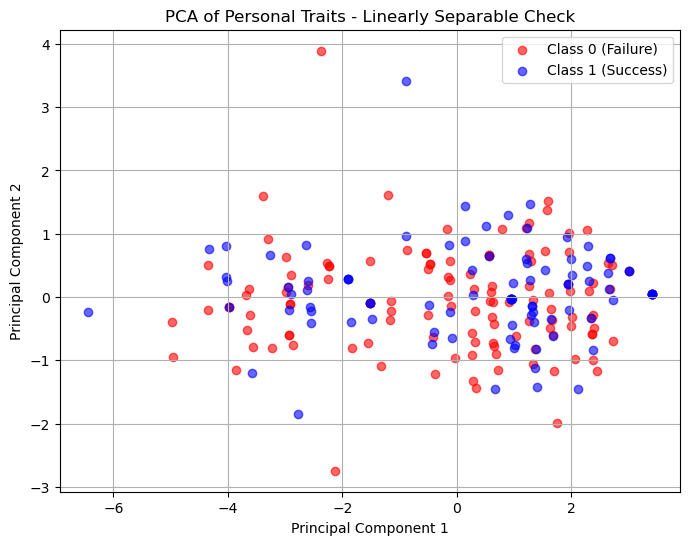

Accuracy: 0.47
The data does not appear to be linearly separable.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('data.csv')

# Select relevant features for the analysis
features = ['Perseverance', 'DesireToTakeInitiative', 'Competitiveness', 
            'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 
            'GoodPhysicalHealth']

# Prepare the feature matrix (X) and the target variable (y)
X = data[features]
y = data['y']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Class 0 (Failure)', alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Class 1 (Success)', alpha=0.6)
plt.title('PCA of Personal Traits - Linearly Separable Check')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Determine if the data is linearly separable
if accuracy > 0.95:
    print("The data appears to be linearly separable.")
else:
    print("The data does not appear to be linearly separable.")
